# Single Objective Optimization (SLSQP)

In [1]:
from wpaf_opt import *

# ============================================================================ #
#                       Single Objective Optimization                          #
# ============================================================================ #

x_init, p_init, x, soo_res_best, p_best, op_obj = wpaf_single_opt()

aqua_init_obj = Aqua_Obj(x_init.nom0, x_init.name, p_init.nom_dict)
aqua_opt_obj = Aqua_Obj(soo_res_best.x, x.name, p_best) 

print_init_result(aqua_init_obj)
print_soo_optimize_result(aqua_opt_obj, x.list, x.unit, soo_res_best)

++++++++++++++++++++++++++++++++++++++++
Initial objective function terms:
   Objective_func      5.286
   cost per yield     52.861 [Million $ / kilo Tonne]
   NPV               134.516 [Million $]
   fish yield          2.545 [kilo Tonne]
----------------------------------------
Initial wave energy converter:
   wec number          6.250 [-]
   wec_P_ave          76.226 [kW]
   wec AEP        4176248.953 [kWh]
----------------------------------------
Initial price break down:
   wec NPV                  40.318 [Million $] 30.0 [%]
   wec CapEx                32.142 [Million $]
   wec OpEx                  0.772 [Million $]
   Aqua NPV                 89.741 [Million $] 66.7 [%]
   Net Pen CapEx            12.723 [Million $]
   Feedbarge CapEx           3.734 [Million $]
   fish feed OpEx            5.290 [Million $]
   fingerling OpEx           1.627 [Million $]
   vessel travel NPV         1.125 [Million $] 0.8 [%]
   energy storage NPV        3.331 [Million $] 2.5 [%]
   diesel gen

# Plot Objective Function and Constraints (Convergence Results)

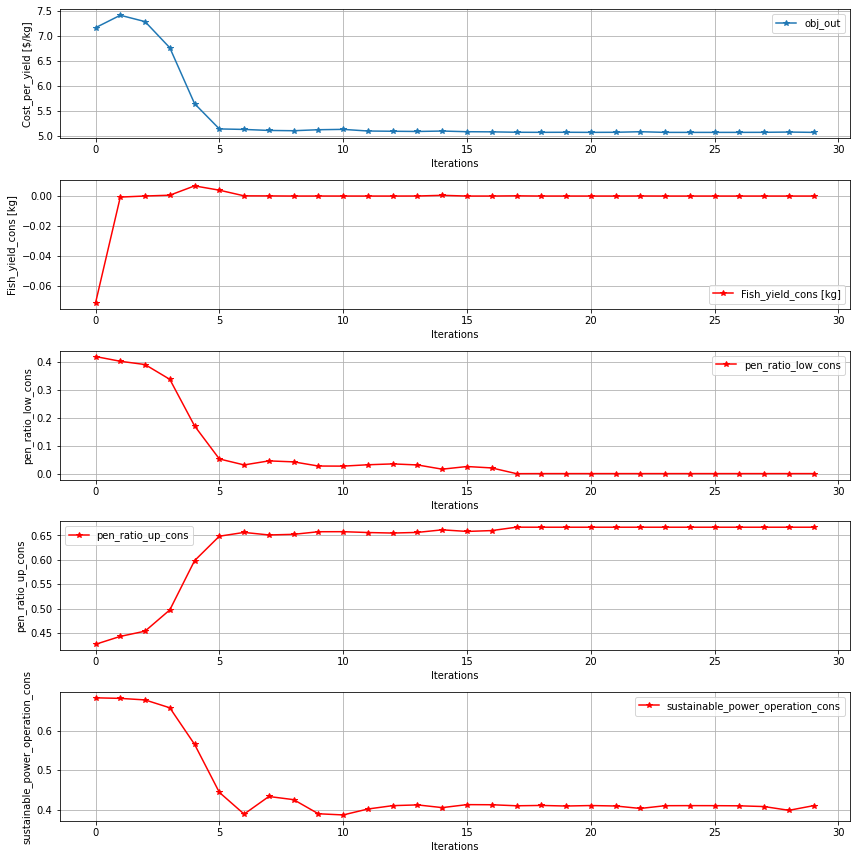

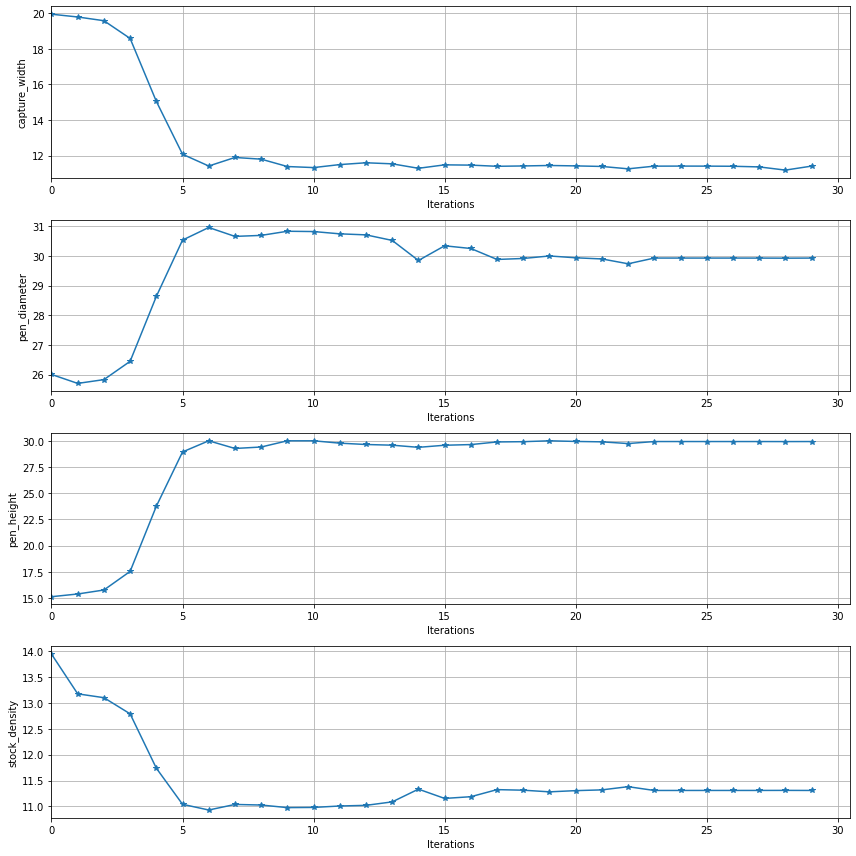

In [2]:
from matplotlib import pyplot as plt

cons_title = ['Fish_yield_cons [kg]','pen_ratio_low_cons', 'pen_ratio_up_cons', 'sustainable_power_operation_cons']
cons_no = len(cons_title)

fig, axes = plt.subplots(1+cons_no, 1, figsize=(12, 12))

ax0 = axes[0]
ax0.plot(op_obj.f, label='obj_out', marker='*')
ax0.set(xlabel='Iterations', ylabel='Cost_per_yield [$/kg]')
ax0.legend()
ax0.grid(True)


for i in range (cons_no):
    ax_cons = axes[i+1]
    ax_cons.plot(op_obj.ineq[:, i], 'r', label=cons_title[i], marker='*')
    ax_cons.set(xlabel='Iterations', ylabel=cons_title[i]);
    ax_cons.legend()
    ax_cons.grid(True)

plt.tight_layout()
plt.show()

#fig for design var
fig_x, ax_x = plt.subplots(len(x.list),1, figsize=(12, 12))
for ii in range(len(x.list)):
    ax_x[ii] = plt.subplot(len(x.list),1,ii+1)
for i in range(len(x.list)):
    ax_x[i].plot(op_obj.x_history[:, i], marker='*')
    ax_x[i].set(xlabel='Iterations', ylabel=x.list[i])
    ax_x[i].grid(True)
    ax_x[i].set_xlim(0, None)
    #ax_x[i].set_ylim(5, 85)
    ax_x[i].ticklabel_format(useOffset=False, style='plain', axis='y')
plt.tight_layout()
plt.show()

# Plot power

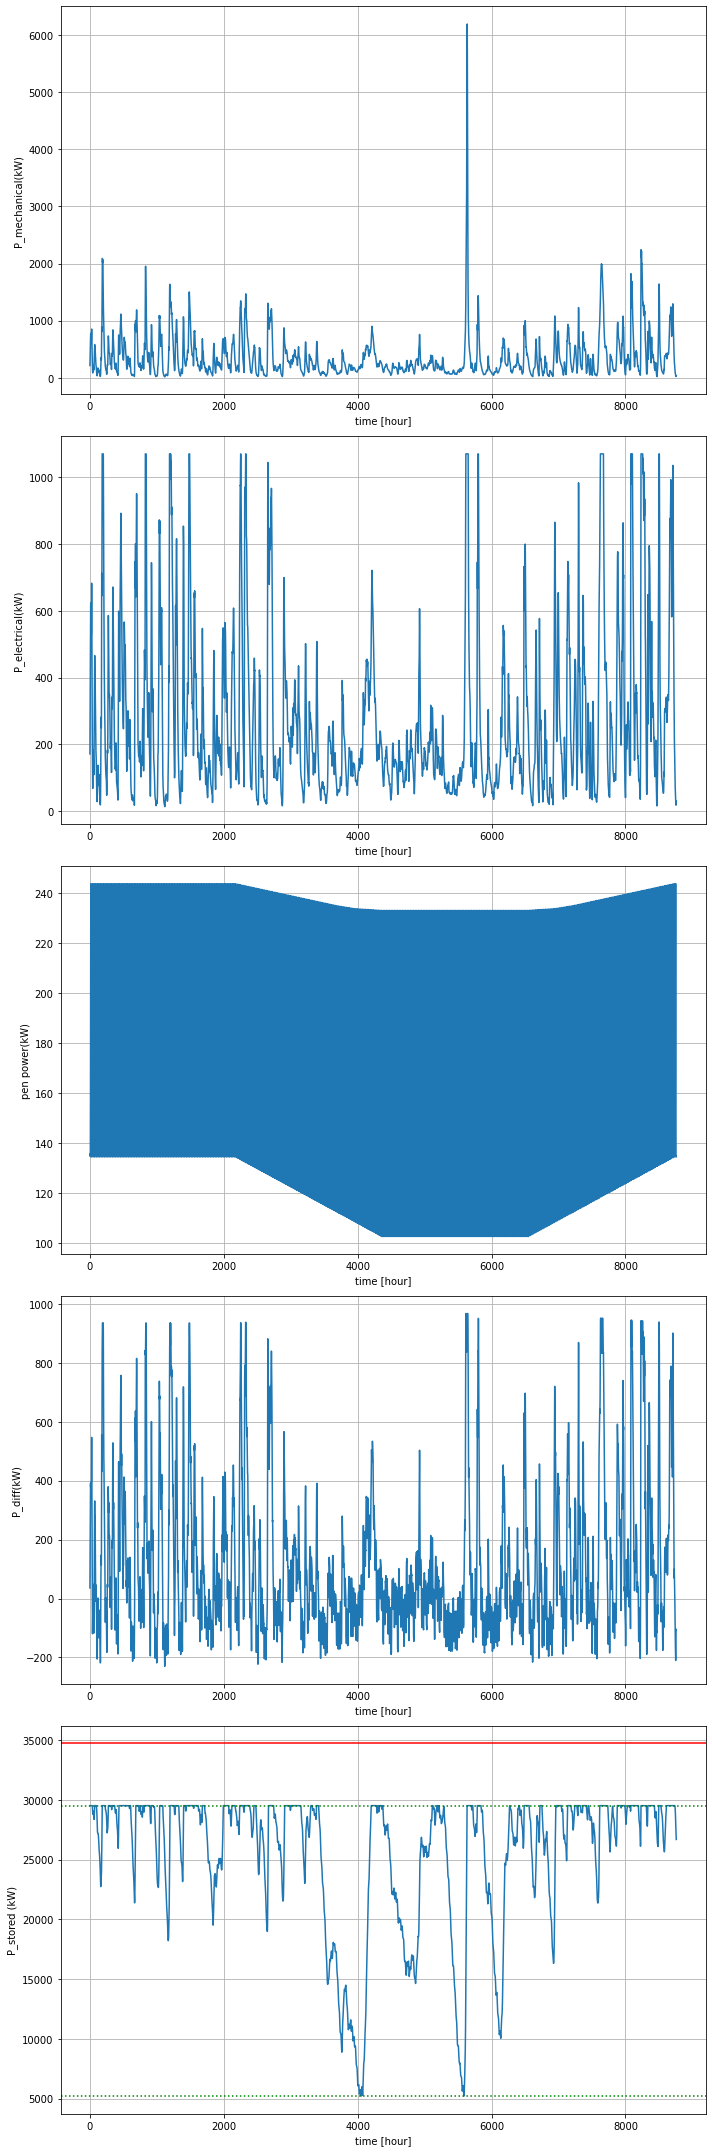

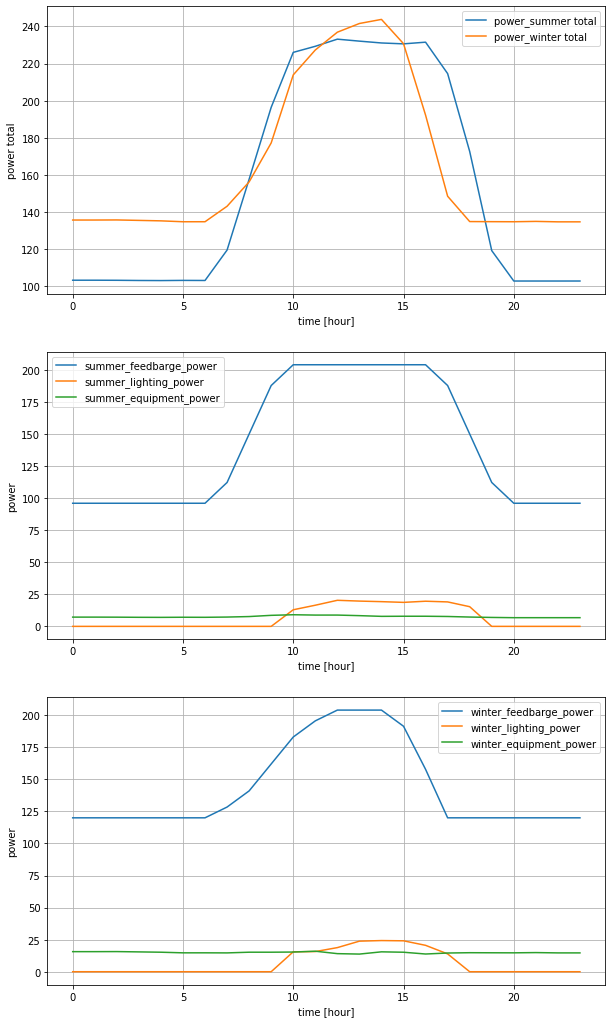

In [3]:
aqua_opt_obj.plot_power()

# Plot fish growth and fish oxygen demand

DO2 for 1kg fish 503.41478452124636
DO2 for 2kg fish 1181.6539373457142
DO2 for 3kg fish 1877.8547702641881
fish weight after 365 days 3755.9806490260316


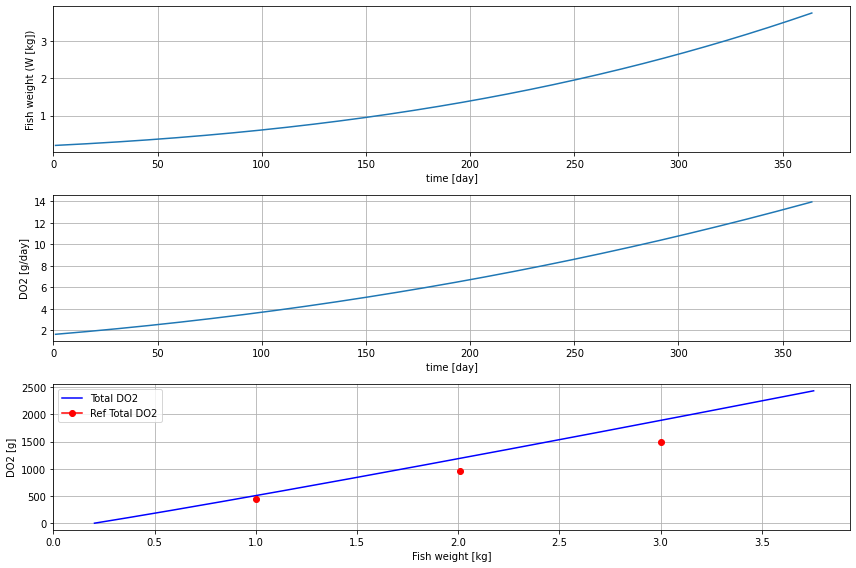

In [4]:
aqua_opt_obj.plot_variable()

# Single Objective Optimization (NSGA2)

In [5]:
from wpaf_opt import *

args = {}
args['moo_n_obj'] = 1
x, moo_res_best, p_best, op_obj = wpaf_multi_opt(args_in = args)

aqua_opt_obj = Aqua_Obj(moo_res_best.X, x.name, p_best) 
print_moo_optimize_result(aqua_opt_obj, x.list, x.unit, moo_res_best)

optimization success: True
optimal design variable:
   capture_width      11.494 [m]
   pen_diameter       30.103 [m]
   pen_height         29.989 [m]
   stock_density      11.238 [kg/m^3]
   pen number         12.000 [-]
----------------------------------------
deployment Location:
   Longitude       -67.879
   Latitude         43.491
----------------------------------------
optimal objective function terms:
   Objective_func      5.074
   cost per yield     50.744 [Million $ / kilo Tonne]
   NPV               146.056 [Million $]
   fish yield          2.878 [kilo Tonne]
----------------------------------------
optimal wave energy converter:
   wec number          3.592 [-]
   wec_P_ave          76.226 [kW]
   wec AEP        2400111.898 [kWh]
----------------------------------------
optimal price break down:
   wec NPV                  23.171 [Million $] 15.9 [%]
   wec CapEx                18.472 [Million $]
   wec OpEx                  0.444 [Million $]
   Aqua NPV                11